### **ReadME**

**Neste projeto foi desenvolvido a solução para um problema real. A necessidade é o controle financeiro de empresas e seus funcionarios. Unindo a técnologia de visão computacional e detecção de caracteres foi possivel gerar um resultado positivo.**

Para a utilização deste ambiente é necessario seguir os passos detalhados abaixo: 

* **Realizar a instalação das bibliotecas do "Tesseract-OCR" (1º Célula)**
  *Nesta etapa já será baixado o Banco de Imagens diretamente do Google Drive.*



---



* **Importar as bibliotecas (2º Célula)**


---



* **Selecionar imagem do Banco de Imagens (3º Célula)**

  *Essa opção é possivel selecionar diferentes imagens oferecidas no banco, todas seguem o padrão da nomeclatura do design do cupom e seu respectivo valor.*

  *Caso seja retornado um erro, reinicie o ambiente pela opção "Ambiente de Execução" > "Reiniciar Ambiente de Execução" e siga a partir da 2º Célula.*

  *Em troca de imagens, siga da 3º Célula adiante.* 



---



* **Aplicar definições (4º a 6º Célula)**



---



* **Etapas de Pré-Processamento (7º a 9º Célula)**



---



* **Segmentação (10º Célula)**

  *É possivel alterar o nivel da segmentação alterando a numeração após o "(gray, " "). Lembrando que é necessario ser numero IMPAR.*



---



* **Exportação Resultado (11º Célula)**



---



* **Histograma de comparação de valores entre as imagens (12º Célula)**



---



* **Tesseract e Resultados (13º a 18º Célula)**

 *Aqui a imagem será analisada e será gerado o resultado final das detecções. É lembrado que em diferentes designs de cupons e qualidade de imagem pode interferencia no resultado final.*



### **Instalação de Bibliotecas Essênciais e Banco de Imagens**

In [1]:
#Instalação de bibliotecas Tesseract-OCR

!sudo apt install tesseract-ocr
!pip install pytesseract


#Importar Banco de Imagens
!gdown --folder https://drive.google.com/drive/folders/1fq-nKEgqMVagK3HcDgebo4ooyAfkVL4-?usp=share_link -O /content/BANCO

from IPython.display import clear_output
clear_output(wait=False)

### **Importação de Principais Bibliotecas**

In [2]:
import numpy as np #Biblioteca para 
import cv2 #OpenCV
import matplotlib.pyplot as plt #Matplotlib
import pytesseract #Pytesseract
import re #Re

from pytesseract import Output 
from skimage.filters import threshold_local
from PIL import Image

### **Entrada da Imagem**

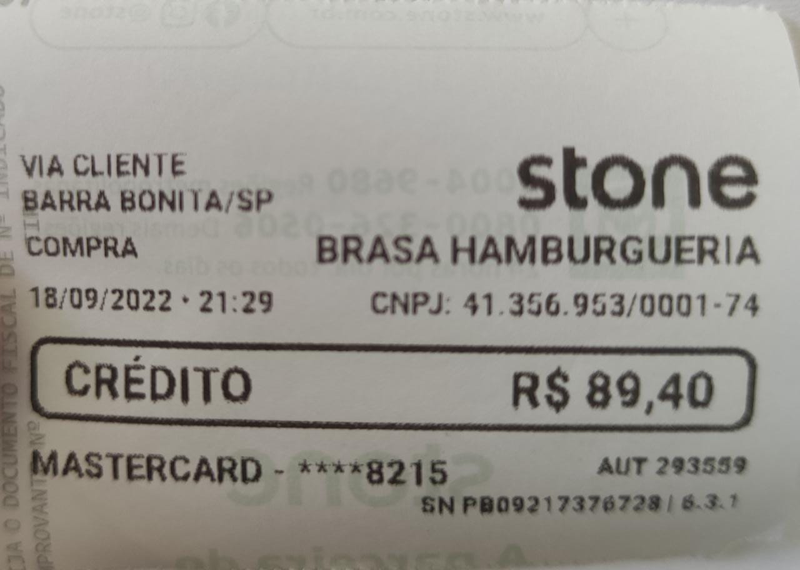

In [3]:
# Selecionar Imagem do Banco
file_name = '/content/BANCO/Stone_89.jpeg'
image = Image.open(file_name)
image.thumbnail((800,800), Image.ANTIALIAS)
image

### **Definições**

In [4]:
def opencv_resize(image, ratio):
    width = int(image.shape[1] * ratio)
    height = int(image.shape[0] * ratio)
    dim = (width, height)
    return cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

In [5]:
def plot_rgb(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [6]:
def plot_gray(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(image, cmap='Greys_r')

### **Pré-processamento**

*   **Redimensionamento da Imagem**












In [7]:
image = cv2.imread(file_name)
resize_ratio = 500 / image.shape[0]
original = image.copy()
image = opencv_resize(image, resize_ratio)

*   **Converter para Escala de Cinza**


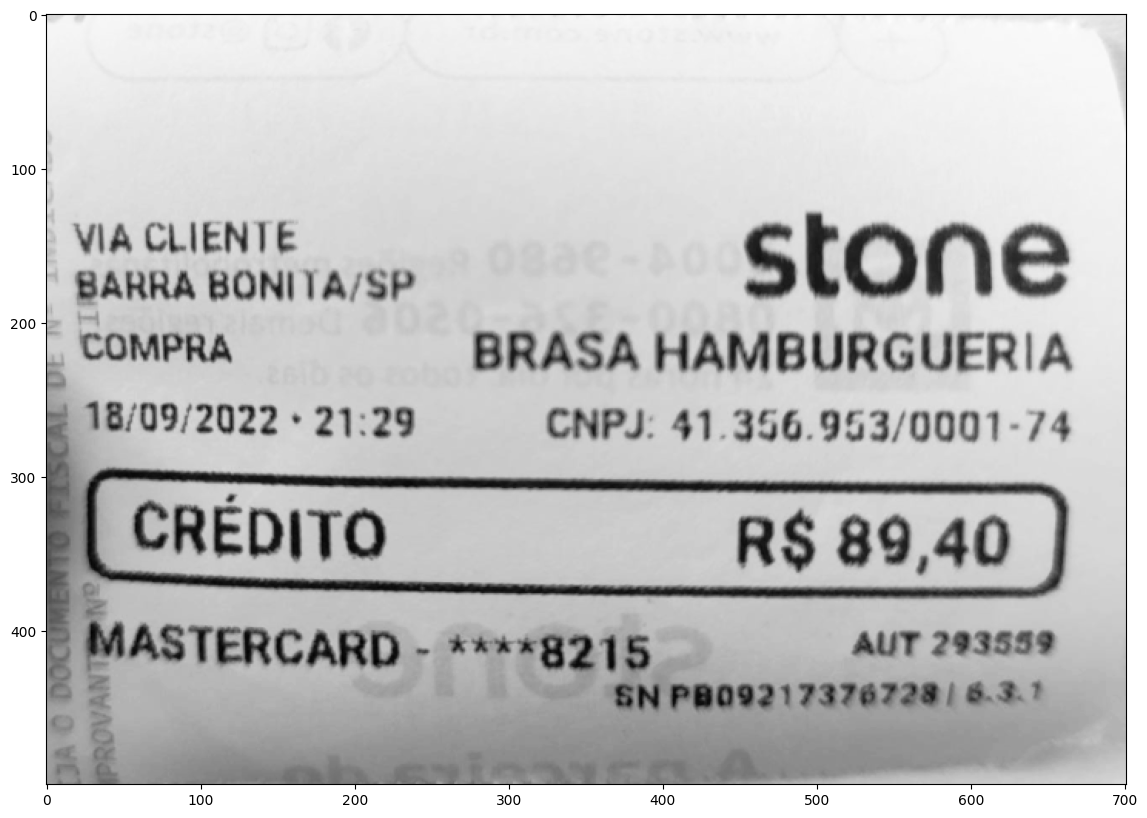

In [8]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plot_gray(gray)

*   **Blur Gaussiano para Redução de Ruídos**


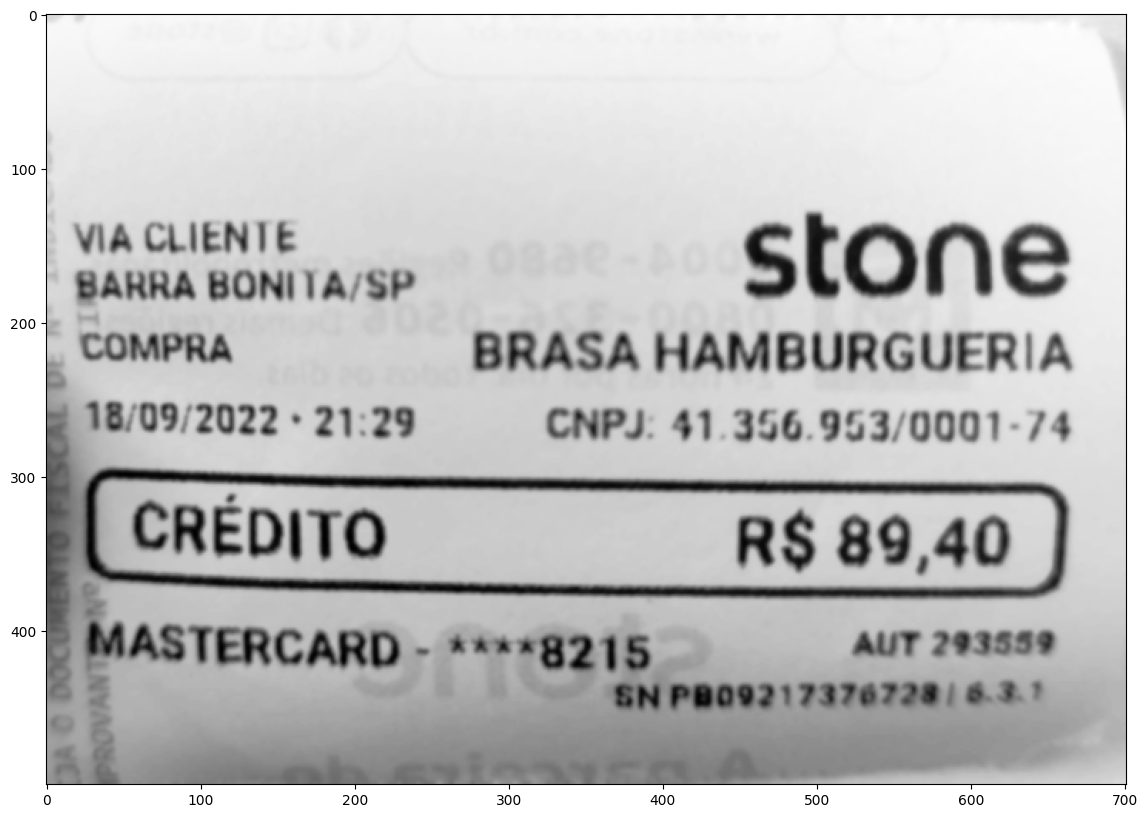

In [9]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
plot_gray(blurred)

### **Segmentação**

*   **Método de segmentação Gaussiano (Destaca as bordas)**

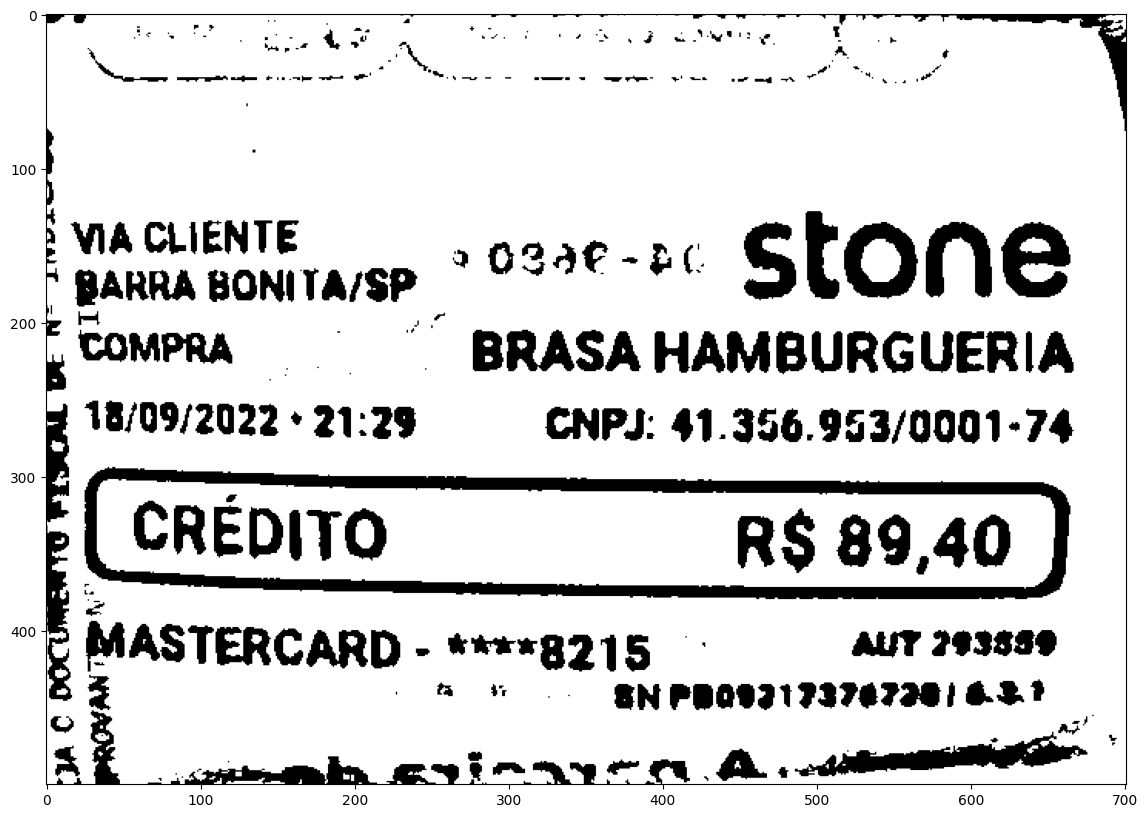

In [10]:
def bw_scanner(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    T = threshold_local(gray, 91, offset = 5, method = "gaussian")
    return (gray > T).astype("uint8") * 255

result = bw_scanner(image)
plot_gray(result)

*   **Exportação de resultado**

In [11]:
output = Image.fromarray(result)
output.save('result.png')

### **Histograma de comparação de cores**

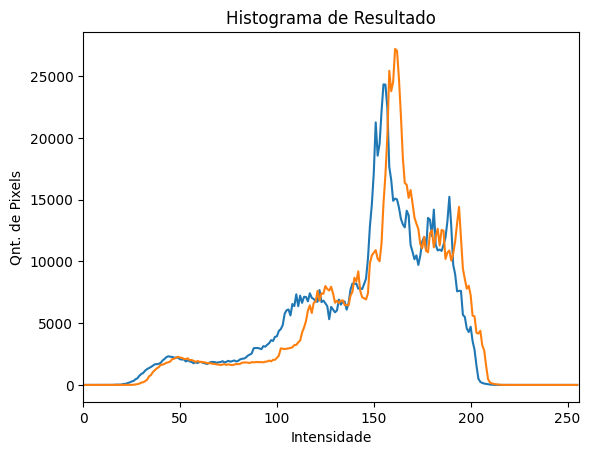

In [12]:
img_original = cv2.imread(file_name)

#Converter para escala de cinza
gray = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)


#Função calcHist para calcular o histograma da imagem
h = cv2.calcHist([img_original], [0], None, [256], [0, 256])
h2 = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.figure()

#Legendas Histograma
plt.title("Histograma de Resultado")
plt.xlabel("Intensidade")
plt.ylabel("Qnt. de Pixels")

#Plotagem de resultados
plt.plot(h)
plt.plot(h2)
plt.xlim([0, 256])
plt.show()

### **Tesseract-OCR e Extração de Palavras**

*   **Atribuição da Imagem Segmentada**

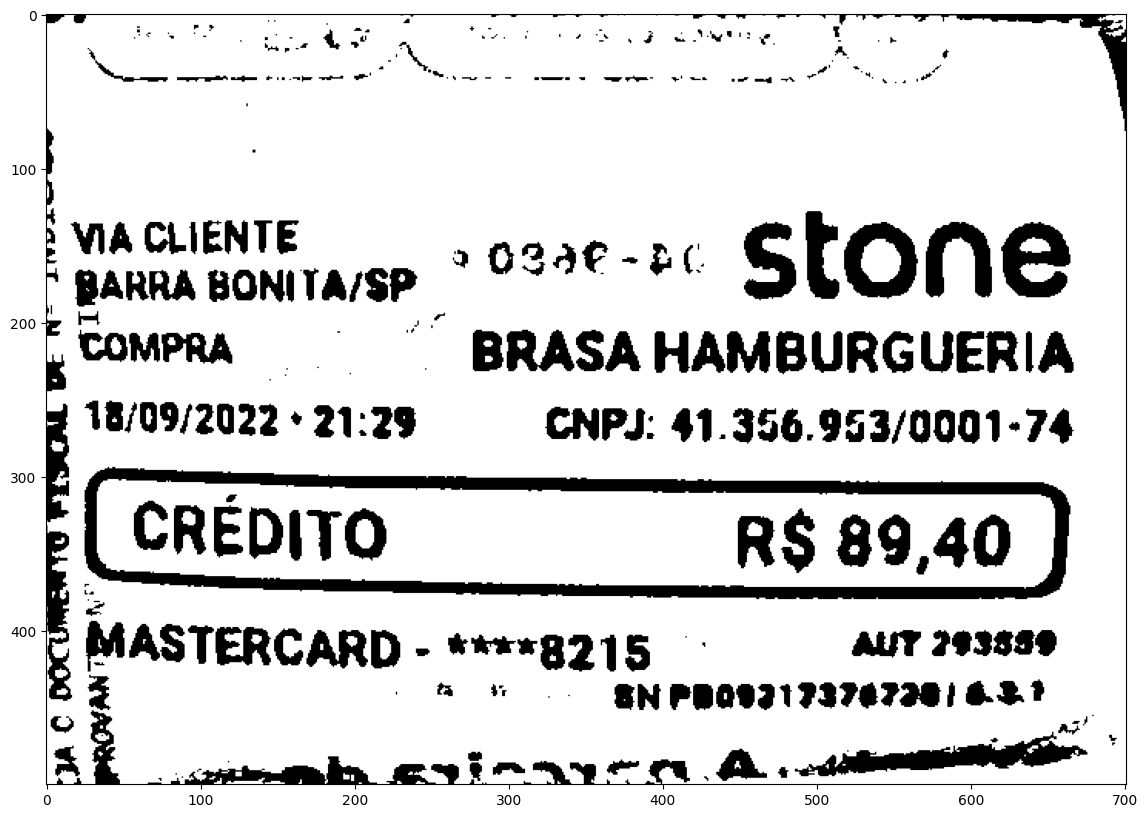

In [13]:
file_name = "result.png"
image = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE) 
plot_gray(image)

*   **Leitura de dados na Imagem e aplicação de BoundBox**

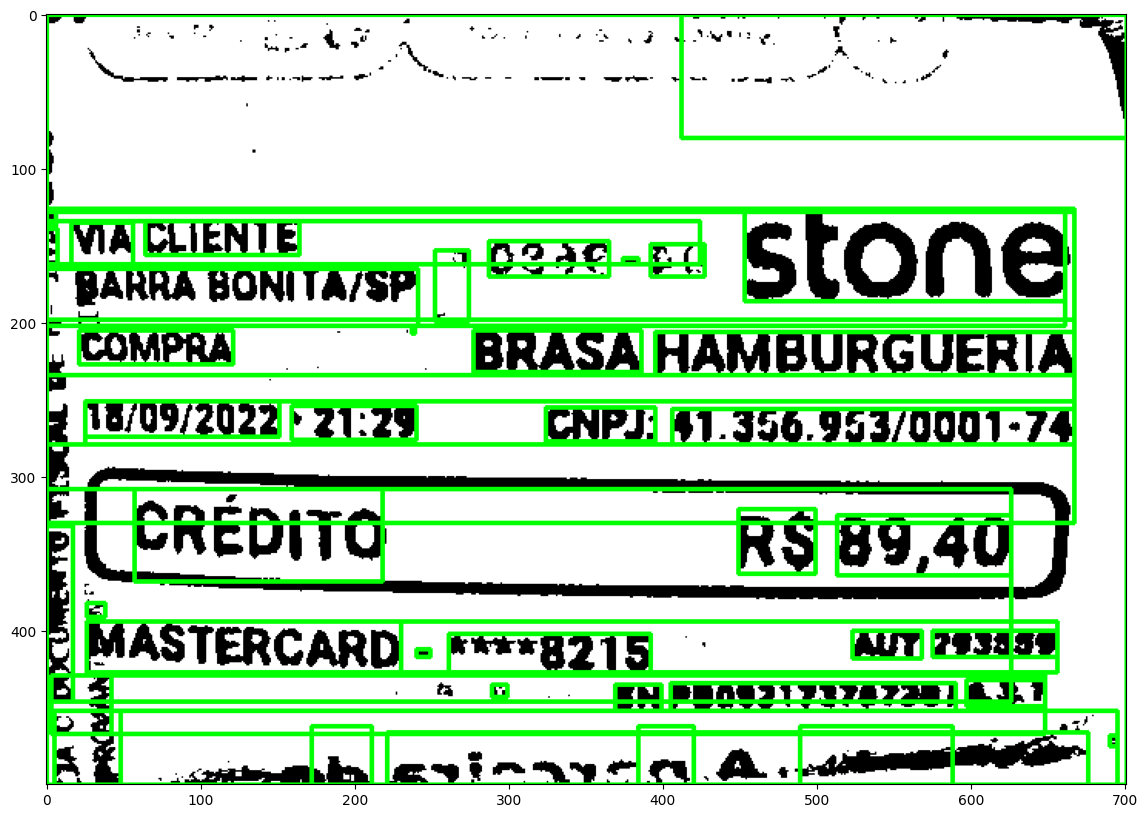

In [14]:
d = pytesseract.image_to_data(image, output_type=Output.DICT)
n_boxes = len(d['level'])
boxes = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2RGB)
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])    
    boxes = cv2.rectangle(boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
plot_rgb(boxes)

*   **Textos Extraidos**

In [15]:
texto_extraido = pytesseract.image_to_string(image)
print(texto_extraido)

 

+

: VIA GLIENTE -Be
“panraBonitassp ° O97 “PC stone
COMPRA ~ BRASA HAMBURGUERIA
18/09/2022 +21:28 _CNPJ: 41.356.963/0001-74

j CREDITO R$ 89,40

MASTERCARD - ****9215 aur 293859

og * SN PRONI17970720! 6.97

a an cetmnye ce ocean *

ty



*  **Filtro de valores**

In [16]:
def encontrar_total(text):
    amounts = re.findall(r'\d+\,\d{2}\b', text)
    floats = [str(amount) for amount in amounts]
    unique = list(dict.fromkeys(floats))
    return unique

*   **Encontrar maior valor indicado**

In [17]:
total = encontrar_total(texto_extraido)
total

['89,40']

*   **Valor Final**

In [ ]:
max(total)